# HW4 Simulation of Income
## Jie Heng
## MACS 3000

In [25]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

### Question 1

Set parameters

In [26]:
# The start working year：
t_start = 2019
# The end of working year:
t_end = 2058
# positive effect rate 
p = 0.2
# growth rate of annual salary 
g = 0.03
# initial income
inc0 = 80000
# number of simulations
n = 10000
# mean of log-normal errors
err_mean = 0
# standard deviation of log-normal errors
std_dvt = 0.1
# set a random seed
seed = 524

Simulate 10000 different realizations of lifetime income

In [27]:
def get_income(seed, t_start, t_end, err_mean, std_dvt, n, p, g, inc0):
    '''
    Based on the given conditions and formula, get a income matrix.
    '''
    # set random seed
    np.random.seed(seed)
    # draw 'err' samples from a log-normal distribution.
    err = np.random.normal(err_mean, std_dvt, (40, n))
    # get a income matrix filled with 0
    inc = np.zeros((40, n))
    # get the income of 2019 
    inc[0, :] = np.log(inc0) + err[0, :]
    # loop and apply model
    for i in range(1, 40):
        inc[i, :] = (1 - p) * (np.log(inc0) + g * i ) + p * inc[i - 1, :] + err[i, :]
        
    return inc
inc = get_income(seed, t_start, t_end, err_mean, std_dvt, n, p, g, inc0)

Plot

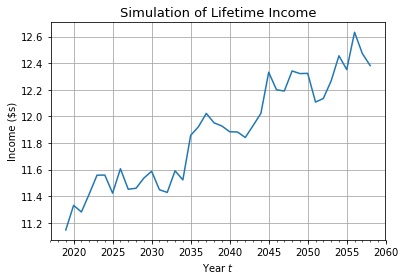

In [28]:
%matplotlib inline
year = np.linspace(t_start, t_end, 40)
fig, ax = plt.subplots()
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
# choose one simulation and plot
plt.plot(year, inc[:,0])
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Simulation of Lifetime Income',fontsize=13)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Income (\$s)')
plt.show()

### Question 2

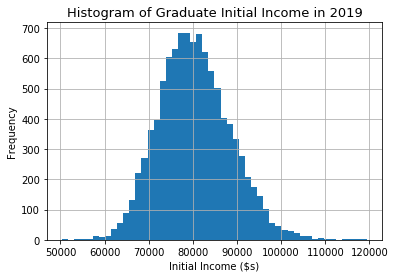

In [29]:
# get the income of 2019
inc_19 = np.exp(inc[0, :])
# plot
%matplotlib inline
fig, ax = plt.subplots()
plt.hist(inc_19,50)
plt.xlabel(r'Initial Income (\$s)')
plt.ylabel('Frequency')
plt.title('Histogram of Graduate Initial Income in 2019',fontsize=13)
plt.grid(True)
plt.show()

In [30]:
a = round((np.sum(inc_19 > 100000)) / n * 100, 2)
b = round((np.sum(inc_19 < 70000)) / n * 100, 2)
print ('{}% of students will earn more than $100,000'.format(a))
print('{}% of students will earn less than $70,000'.format(b))
print('The distribution is normally distributed. The histogram looks like a bell curve.')

1.27% of students will earn more than $100,000
9.02% of students will earn less than $70,000
The distribution is normally distributed. The histogram looks like a bell curve.


### Question 3

Set parameters

In [31]:
# pay off rate
save_rate=0.1
# initial debt
debt=95000

Use a function to get how many years it takes to pay off the debt for each simulations 

In [32]:
def get_save_year(inc, save_rate, debt, n):
    # get the saved money
    saved_money = np.exp(inc) * save_rate
    # reference: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.cumsum.html
    # sum over rows for each of the simulation
    total_saved = np.cumsum(saved_money, 0) 
    # store the number pf years that each simulation needs to save the debt
    save_years = np.zeros(n)
    total_saved_t = total_saved.transpose()
    # get the years for each simulation to save for the debt
    for simulation in range(n):
        for yr in range(0, 40):
            if np.sum(total_saved_t[simulation, yr]) >= debt:
                save_years[simulation] = yr 
                break
         
    return save_years
        
save_years = get_save_year(inc, save_rate, debt, n)
pay_off_rate = round((len([i for i in save_years if i < 10]) / n * 100), 2)
print('{}% graduates will be able to pay off the loan in 10 years.'.format(pay_off_rate))

18.47% graduates will be able to pay off the loan in 10 years.


Plot

C:\Users\hengj\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


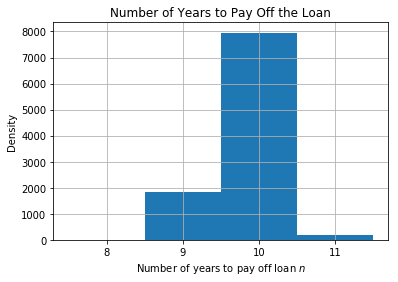

In [33]:
def hist(save_years):
    %matplotlib inline
    fig, ax = plt.subplots()
    plt.hist(save_years, bins = np.arange(min(save_years) - 0.5, max(save_years) + 1, 1)) 
    plt.xlabel(r'Number of years to pay off loan $n$')
    ticks = np.linspace(min(save_years), max(save_years), max(save_years)-min(save_years) + 1)
    plt.xticks(ticks)
    plt.ylabel('Density')
    plt.title('Number of Years to Pay Off the Loan')
    plt.grid(True)
    plt.show()
hist(save_years)

### Question 4

70.2% graduates will be able to pay off the loan in 10 years.


C:\Users\hengj\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


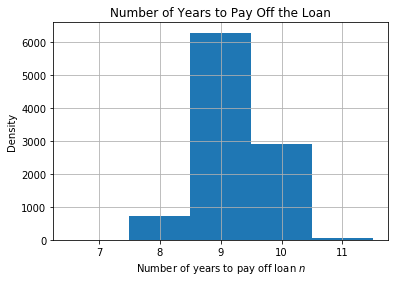

In [35]:
# set parameters:
inc0 = 85000
std_dvt= 0.15
# get new inc and save_years
inc = get_income(seed, t_start, t_end, err_mean, std_dvt, n, p, g, inc0)
save_years = get_save_year(inc, save_rate, debt, n)

pay_off_rate = round((len([i for i in save_years if i < 10]) / n * 100), 2)
print('{}% graduates will be able to pay off the loan in 10 years.'.format(pay_off_rate))

# plot
hist(save_years)
